In [2]:
import pandas as pd
combats = pd.read_csv("combats.csv")
combats.head(5)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


First row is No.266 pokemon vs No.298 pokemon battle, and No.298 pokemon is Winner. What are No.266 pokemon and No.298 pokemon? Check on pokemon.csv.

In [3]:
pokemon = pd.read_csv("pokemon.csv")
pokemon_266_298 = pokemon[pokemon['#'].isin([266, 298])]
pokemon_266_298

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
265,266,Larvitar,Rock,Ground,50,64,50,45,50,41,2,False
297,298,Nuzleaf,Grass,Dark,70,70,40,60,40,60,3,False


No.266 pokemon is Lavitar. No.298 pokemon is Nuzleaf

Winner is Nuzleaf. Nuzleaf's type is Rock and Ground, and Lavitar's type is Grass and Dark. Pokemon Type Chart is a following figure. According to this type chart, Nuzleaf has type advantage.

In [4]:
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
combats_name.head(3)


,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem


## In combats file, Head 3 Battles and Winners:

* Larvitar (Rock/Ground) vs Nuzleaf (Grass/Dark) -> Winner: Nuzleaf
* Virizion (Fighting/Grass) vs Terrakion (Fighting/Rock) -> Winner: Terrakion
* Togetic (Fairly/Flying) vs Beheeyem (Psychic) -> Winner: Beheeyem


* 1-2. Analysis on Base stats
* In Pokemon Game, species's base stats are an important defining characteristic.
* Pokemons with high base stat total are strong and popular on battle.
* Check the base stats total distribution for all pokemons.

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: stats_sum, dtype: float64


C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


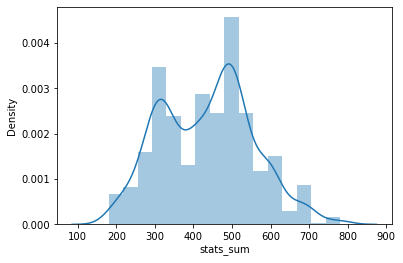

In [5]:
pokemon["stats_sum"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(pokemon["stats_sum"].describe())
sns.distplot(pokemon["stats_sum"])
plt.show()

* This distribution histogram shows that base stat total's distribution has a bimodal distribution.
* First modal is around 300 and the other is around 500. 
* Next, Check the difference distribution of total base stats between one pokemon and the other pokemon in each match.



count    50000.000000
mean       136.551440
std        101.221212
min          0.000000
25%         54.000000
50%        118.000000
75%        200.000000
max        590.000000
dtype: float64


C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


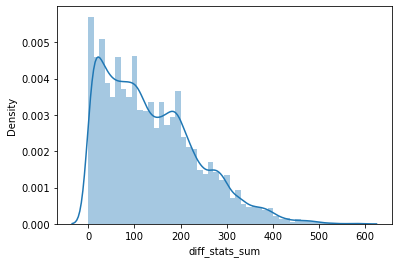

In [6]:
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
combats_stats_sum = combats[cols].replace(stats_sum_dict)
diff_stats_sum = abs(combats_stats_sum["First_pokemon"]-combats_stats_sum["Second_pokemon"])
print(diff_stats_sum.describe())
sns.distplot(diff_stats_sum)
plt.xlabel("diff_stats_sum")
plt.show()

* On this distribution, median is 118.
* Around 50% match are the battle has the difference more than 100 values.
* Then, did pokemon with higher total base stats win a battle against pokemon with lower total base stats?

count    50000.000000
mean        79.776320
std        150.093351
min       -562.000000
25%        -20.000000
50%         80.000000
75%        186.000000
max        590.000000
dtype: float64


C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


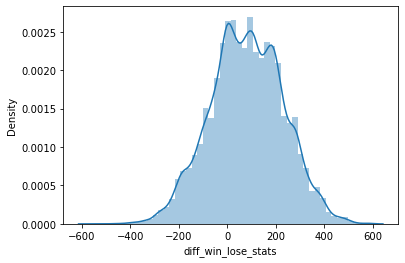

In [7]:
combats_stats_sum["Loser"] = combats_stats_sum.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)
diff_win_lose_stats = combats_stats_sum["Winner"] - combats_stats_sum["Loser"]
print(diff_win_lose_stats.describe())
sns.distplot(diff_win_lose_stats)
plt.xlabel("diff_win_lose_stats")
plt.show()


This distribution shows there is a tendency that pokemon with higher total base stats win a battle against pokemon with lower total base stats. It looks like "A base stats total is a main factor for winning". On the other hand, there are battles pokemon with lower base stats surpasses one's superiors. Check the combination battles pokemon with lower base stats surpasses one's superiors with more than 100 values.

In [8]:
stats_sum_dict_re = dict(zip(pokemon['stats_sum'], pokemon['#']))
combats_stats_sum["diff"] = diff_win_lose_stats
surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -100]
print ("Surpassing one's superiors Battle number : " + str(len(surpassing_stats_sum)))
surpassing_id = surpassing_stats_sum[cols].replace(stats_sum_dict_re)
surpassing_name = surpassing_id[cols].replace(names_dict)
surpassing_name.join(combats_stats_sum["diff"]).head(8)

Surpassing one's superiors Battle number : 5716


,First_pokemon,Second_pokemon,Winner,diff
5,Joltik,Aegislash Shield Forme,Joltik,-201
36,Pancham,Whismur,Whismur,-108
37,Clauncher,Dusclops,Clauncher,-125
42,Goomy,Bouffalant,Goomy,-190
51,Mega Rayquaza,Aegislash Shield Forme,Aegislash Shield Forme,-260
158,Bouffalant,Vullaby,Vullaby,-120
168,Keldeo Resolute Forme,Arbok,Arbok,-142
174,Gothorita,Volcanion,Gothorita,-210


The number of combination has the difference more than 100 total values is 5716 combinations. These combinations account for 10% of all battles. Head 8 combinations and winners are below.

I want to know the combination has max difference of total base stats.

In [9]:
surpassing_name.join(combats_stats_sum["diff"]).sort_values(by="diff").head(4)

,First_pokemon,Second_pokemon,Winner,diff
5861,Mega Rayquaza,Cleffa,Cleffa,-562
2480,Mega Rayquaza,Cleffa,Cleffa,-562
41824,Shedinja,Mega Rayquaza,Shedinja,-544
3506,Mega Rayquaza,Inkay,Inkay,-492


Mega Rayquaza has lost to pokemons with much lower base stats. The difference between Mega Rayquaza and Clefa is 562.

1-3. Why it happen superior pokemons lose to inferior pokemons?
In my idea, there may be 2 factors.

First Attack
Type advantage
Firstly, Check the effectiveness of first attack.

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


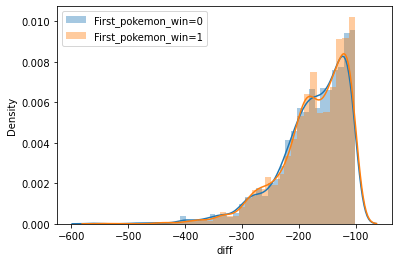

In [10]:
combats_stats_sum["First_Win"] =  combats_stats_sum.apply(lambda x: 1 if x["First_pokemon"] ==  x["Winner"] else 0, axis = 1)
surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -100]
sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==0]["diff"], label="First_pokemon_win=0")
sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==1]["diff"], label="First_pokemon_win=1")
plt.legend()
plt.show()

No difference between First attacker win and lose based on the base stats difference.
Is it same on all combination battles?

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-First_Win=0-
count    26065.000000
mean        76.155764
std        152.292707
min       -562.000000
25%        -27.000000
50%         79.000000
75%        185.000000
max        585.000000
Name: diff, dtype: float64
-First_Win=1-
count    23935.000000
mean        83.719072
std        147.563182
min       -544.000000
25%        -13.000000
50%         82.000000
75%        190.000000
max        590.000000
Name: diff, dtype: float64


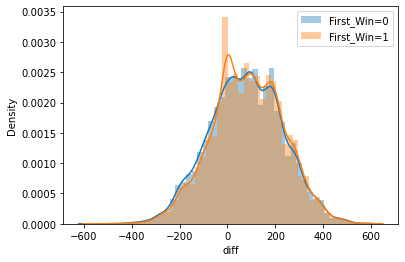

In [11]:
sns.distplot(combats_stats_sum[combats_stats_sum["First_Win"]==0]["diff"], label="First_Win=0")
sns.distplot(combats_stats_sum[combats_stats_sum["First_Win"]==1]["diff"], label="First_Win=1")
print ("-First_Win=0-")
print (combats_stats_sum[combats_stats_sum["First_Win"]==0]["diff"].describe())
print ("-First_Win=1-")
print (combats_stats_sum[combats_stats_sum["First_Win"]==1]["diff"].describe())
plt.legend()
plt.show()